# Data Exploration

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [4]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [5]:
df.nunique()

Y     2
X1    4
X2    5
X3    5
X4    5
X5    5
X6    5
dtype: int64

# Preprocessing

In [6]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = df["Y"]

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_ohe = enc.fit_transform(X)
X_enc = pd.DataFrame(enc_ohe.toarray())
X_enc.columns = enc.get_feature_names()

In [8]:
X_enc

,x0_1,x0_3,x0_4,x0_5,x1_1,x1_2,x1_3,x1_4,x1_5,x2_1,...,x4_1,x4_2,x4_3,x4_4,x4_5,x5_1,x5_2,x5_3,x5_4,x5_5
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
122,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
123,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
124,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


The dataset is too small to do a train_test_split method and obtain a 73% accuracy on the test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Base Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
y_pred = cross_val_predict(clf, X, y, cv=3)
print(cross_val_score(clf, X, y, cv=3))

[0.4047619  0.47619048 0.52380952]


# Looking for the best model with TPOTClassifier

In [12]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=50, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
#tpot.fit(X_train, y_train)

tpot.export('tpot_digits_pipeline.py')

Version 0.11.6.post1 of tpot is outdated. Version 0.11.7 was released Wednesday January 06, 2021.



Generation 1 - Current best internal CV score: 0.7036764705882353

Generation 2 - Current best internal CV score: 0.7257352941176471

Generation 3 - Current best internal CV score: 0.7257352941176471

Generation 4 - Current best internal CV score: 0.7264705882352941

Generation 5 - Current best internal CV score: 0.7264705882352942

Generation 6 - Current best internal CV score: 0.7264705882352942

Generation 7 - Current best internal CV score: 0.7264705882352942

Generation 8 - Current best internal CV score: 0.7264705882352942

Generation 9 - Current best internal CV score: 0.7264705882352942

Generation 10 - Current best internal CV score: 0.7264705882352942

Generation 11 - Current best internal CV score: 0.7264705882352942

Generation 12 - Current best internal CV score: 0.7272058823529411

Generation 13 - Current best internal CV score: 0.7279411764705882

Generation 14 - Current best internal CV score: 0.751470588235294

Generation 15 - Current best internal CV score: 0.7514705

In [20]:
print(tpot.score(X, y))

0.7380952380952381


# Bonus: Feature Selection

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(6,'Score'))

  Specs     Score
4    X5  2.273286
0    X1  1.449041
2    X3  0.900104
5    X6  0.541070
3    X4  0.106194
1    X2  0.036161


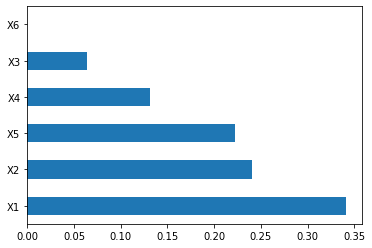

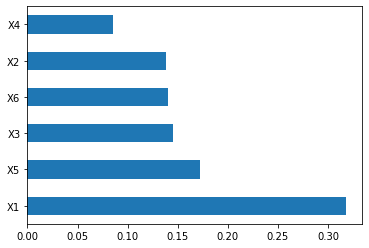

In [34]:
# Average CV score on the training set was: 0.7992647058823529
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
import matplotlib.pyplot as plt

model1 = DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=4, min_samples_split=20)
model2 = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=1.0, min_samples_leaf=3, min_samples_split=7, n_estimators=100)

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=10, min_samples_leaf=4, min_samples_split=20)),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=1.0, min_samples_leaf=3, min_samples_split=7, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
results
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()
feat_importances2 = pd.Series(model2.feature_importances_, index=X.columns)
feat_importances2.nlargest(6).plot(kind='barh')
plt.show()


Although a Chi-2 statistical test gives little importance to the feature X2, we can see that that the optimal machine learning algorithm found by T-POT stacks two models: an ExtraTreesClassifier and a DecisionTreeClassifier. In both models X2 has a relevant importance. Although feature X6 isn't significant in the DecisionTreeClassifier it has its importance for the ExtraTreesClassifier. => No questions should be removed.

# Conclusion

In [27]:
print(tpot.score(X_test, y_test))

0.5952380952380952


In [ ]:
The dataset is very small, so our machine learning algorithm overfits